# Kütüphaneler

In [10]:
import torch
import torch.nn as nn 
import torch.optim as optim  
import torchvision.transforms as transforms 
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset,DataLoader) 
from skimage import io
import time

import warnings
warnings.filterwarnings("ignore")

# Veriyi Dahil Etme

In [11]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

# Veriyi Hazırlama

In [12]:
dataset = veri(
    csv_file="f111.csv",
    root_dir=r"C:\Users\yasar\Desktop\f1_classification",
    transform=torchvision.transforms.Compose([transforms.ToTensor(),
                                              transforms.Resize(size=(28*28)),
                                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=True)

# Veriyi Görselleştirme

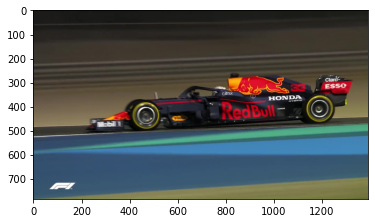

Redbull
torch.Size([1, 3, 784, 1393])


In [13]:
import matplotlib.pyplot as plt
import numpy as np
batch_size=1
classes=["Ferrari","Mclaren","Mercedes","Redbull"]

def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())

# Modeli Yükleme

In [14]:
model=torchvision.models.googlenet(pretrained=True)

In [15]:
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

# Modelin Eğitimi ve Doğruluğu

In [17]:
start=time.time()

optimizer=torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=0,eps=1e-08)#0.00001 ilk
error=torch.nn.CrossEntropyLoss()

epoch=5
count = 0
loss_list = []
iteration_list = []
for i in range(epoch):
    for i,(images,label) in enumerate(train_loader):
        
        out=model(images)
        
        optimizer.zero_grad()
        
        loss=error(out,label)
        
        loss.backward()
        
        optimizer.step()  
        count+=1
        
        if count % 50 == 0:
            total=0
            correct=0
            correct_hata=0
            
            for images,labels in test_loader:
        
                out=model(images.float())
                
                y_pred=torch.max(out.data,1)[1]
                
                total+=len(labels)
                
                correct += (y_pred == labels).sum()
                correct_hata += (y_pred != labels).sum()
            
            accuracy = 100 * correct / float(total)
            hata = 100 * correct_hata / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 50 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}% Error: {}%'.format(count, loss.data, accuracy,hata))

end=time.time()
print("Süre:",end-start)

Iteration: 50  Loss: 1.4111073017120361  Accuracy: 30.37974739074707% Error: 69.62025451660156%
Iteration: 100  Loss: 1.8213664293289185  Accuracy: 24.05063247680664% Error: 75.9493637084961%
Iteration: 150  Loss: 1.9016151428222656  Accuracy: 26.582279205322266% Error: 73.417724609375%
Iteration: 200  Loss: 2.04280948638916  Accuracy: 24.05063247680664% Error: 75.9493637084961%
Iteration: 250  Loss: 1.5974760055541992  Accuracy: 22.78481101989746% Error: 77.2151870727539%
Iteration: 300  Loss: 1.0878292322158813  Accuracy: 20.253164291381836% Error: 79.74683380126953%
Iteration: 350  Loss: 0.945338785648346  Accuracy: 26.582279205322266% Error: 73.417724609375%
Iteration: 400  Loss: 2.3299434185028076  Accuracy: 24.05063247680664% Error: 75.9493637084961%
Iteration: 450  Loss: 2.085512161254883  Accuracy: 18.987340927124023% Error: 81.01265716552734%
Iteration: 500  Loss: 1.3503056764602661  Accuracy: 24.05063247680664% Error: 75.9493637084961%
Iteration: 550  Loss: 1.6154357194900513